# About

tests of PCA vs SVD

for very large sparse matrices

In [4]:
# basic standard libraries
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import OneHotEncoder
import inspect

from sklearn.decomposition import TruncatedSVD

# we will using seaborn for data visualization
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)

# we will also need our custom data transformers
%reload_ext autoreload
%autoreload 2
import src.features.build_features as bf

In [5]:
train_pd = pd.read_csv("../data/raw/train.csv.zip", compression="zip")
test_pd = pd.read_csv("../data/raw/test.csv.zip", compression="zip")
sample_submissions = pd.read_csv("../data/raw/sampleSubmission.csv.zip", compression="zip")

In [6]:
# shuffles the train and test dataframes
train_data, train_labels, dev_data, dev_labels, test_data, test_ids = bf.prep_data(train_pd, test_pd, dev_size = 0.2)

# sets up the pipelines to transform the data and extract new features
selector1 = bf.DataFrameSelector(attribute_names = ["X", "Y", "Dates", "PdDistrict", "Address"], as_df = True)
sfcc = bf.SFCCTransformer()
pipe1 = Pipeline([
    ("selector", selector1),
    ("sfcc", sfcc)
])

selector2 = bf.DataFrameSelector(attribute_names = ["Address"], as_df = True)
sfcc_addr = bf.SFCCAddressTransformer()
ohe = OneHotEncoder()
pipe2 = Pipeline([
    ("selector", selector2),
    ("sfcc", sfcc_addr),
    ("encoder", ohe)
])

full_pipeline = FeatureUnion(transformer_list = [
    ("pipe1", pipe1),
    ("pipe2", pipe2)
])

# extracts new features
train_prepared = full_pipeline.fit_transform(train_data)
dev_prepared = full_pipeline.fit_transform(dev_data)
test_prepared = full_pipeline.fit_transform(test_data)

In [7]:
print("================")
print(type(train_data))
print(list(train_data.columns))
print(train_data.shape)
print(type(train_labels))
print(train_labels.shape)

print("================")
print(type(train_prepared))
print(train_prepared.shape)

print("================")
print(type(dev_data))
print(list(dev_data.columns))
print(dev_data.shape)
print(type(dev_labels))
print(dev_labels.shape)

print("================")
print(type(dev_prepared))
print(dev_prepared.shape)

print("================")
print(type(test_data))
print(list(test_data.columns))
print(test_data.shape)
print(type(test_ids))
print(test_ids.shape)

print("================")
print(type(test_prepared))
print(test_prepared.shape)

<class 'pandas.core.frame.DataFrame'>
['Dates', 'DayOfWeek', 'PdDistrict', 'Address', 'X', 'Y']
(702439, 6)
<class 'pandas.core.series.Series'>
(702439,)
<class 'scipy.sparse.csr.csr_matrix'>
(702439, 36638)
<class 'pandas.core.frame.DataFrame'>
['Dates', 'DayOfWeek', 'PdDistrict', 'Address', 'X', 'Y']
(175610, 6)
<class 'pandas.core.series.Series'>
(175610,)
<class 'scipy.sparse.csr.csr_matrix'>
(175610, 28430)
<class 'pandas.core.frame.DataFrame'>
['Dates', 'DayOfWeek', 'PdDistrict', 'Address', 'X', 'Y']
(884262, 6)
<class 'pandas.core.series.Series'>
(884262,)
<class 'scipy.sparse.csr.csr_matrix'>
(884262, 37551)


In [8]:
# note, due to size of sparse matrix, we can't use the PCA learner
# so we have to use TruncatedSVD learner instead
# note, laptop crashes if n_components much higher than 100
svd = TruncatedSVD(n_components = 100, random_state = 0)
svd.fit(train_prepared) 

TruncatedSVD(algorithm='randomized', n_components=100, n_iter=5,
       random_state=0, tol=0.0)

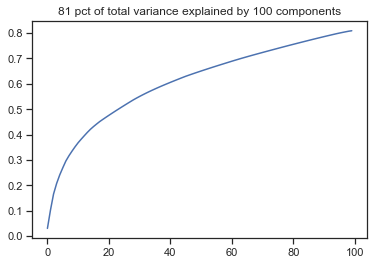

In [9]:
plt.plot(np.cumsum(svd.explained_variance_ratio_))
plt.title("%s pct of total variance explained by %s components" % (np.round(svd.explained_variance_ratio_.sum() * 100, 0).astype(int) , svd.components_.shape[0]))
plt.show()